# Machine Learning Assignment No: 2 (Classification).

# Name: Khuram Shahzad, Roll No: p218742

# ASSIGNMENT QUESTION:

Classify the following dataset to distinguish between skin color and nonskin color. You may try different models but report at least the two top scoring classifiers. Use the following settings for the experiments.
1.	Stratified 5-Fold cross-validation (the dataset is imbalanced)
2.	Report precision, recall, and F1-score (with micro as averaging scheme)

Data Set: https://archive.ics.uci.edu/ml/datasets/Skin+Segmentation

Submit a code document and a word document with setup, results and discussion.


# Importing  Libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix#for visualizing tree 
from sklearn.tree import plot_tree
from sklearn.metrics import precision_recall_curve, f1_score
from sklearn.model_selection import StratifiedKFold
from statistics import mean, stdev
from sklearn import datasets
from sklearn.metrics import confusion_matrix, roc_auc_score ,roc_curve,auc
import seaborn as sns
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier#for checking testing results
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier


# Importing the Data

In [15]:
def load_data():
    '''
    Loading the data for this file into a pandas DataFrame.
    '''
    frame = pd.read_csv(
        "Skin_NonSkin.txt",
        
        # Specify the file encoding
        encoding='utf-8',  # UTF-8 is  common

        # Specify the separator in the data
        sep='\t',          # tab separated values

        # Ignore spaces after the separator
        skipinitialspace=True,

        # Generate row labels from each row number
        index_col=None,

        # Generate column headers row from each column number
        header=0,
    )
    # Return the entire frame
    return frame

# Exploratory Data Analysis (EDA)

In [13]:
#reading the data
def ExploratoryDataAnalysis(i):
    df= load_data()
    df.head()
    #getting information of dataset
    df.info()
    df.head()
    if i==1:
        # let's plot pair plot to visualise the attributes all at once
        sns.pairplot(data=load_data(), hue = 'L1')
ExploratoryDataAnalysis(0)        

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245057 entries, 0 to 245056
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   c1      245057 non-null  int64
 1   c2      245057 non-null  int64
 2   c3      245057 non-null  int64
 3   L1      245057 non-null  int64
dtypes: int64(4)
memory usage: 7.5 MB


We understand that this dataset has 245057 records, 4 columns with the type int and there are no NAN values as form following command

Now we perform some basic EDA on this dataset. Let’s check the correlation of all the features with each other

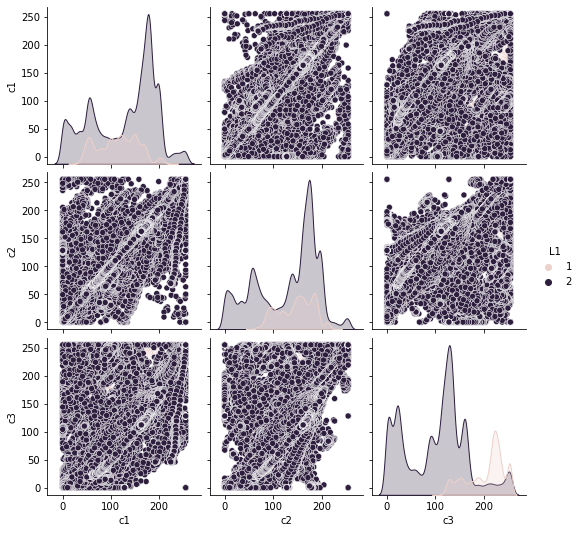

In [22]:
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data=load_data(), hue = 'L1')

We have a total of 2 targets that we want to predict: 1, and 2. We can see that 1 always forms a different cluster from the 2.

# Data Preprocessing

Now, we will separate the target variable(y) and features(X) as follows

In [12]:
def DataPreprocessing():
    df = load_data()
    target = df['L1']
    df1 = df.copy()
    df1 = df1.drop('L1', axis =1)
    # Defining the attributes
    X = np.delete(df1.to_numpy(), (0), axis=0) 
    y = np.delete(target.to_numpy(), (0), axis=0) 
    # converting targt values to (0, 1)
    t=0;
    for i in y:
        if i==1:

            y[t]= 0
        else:
            y[t]= 1
        t=t+1
    return X, y

# Training and Testing

Stratified 5-Fold cross-validation (the dataset is imbalanced)

In [11]:
def ApplyClassifier(model):
    
    model_name = type(model).__name__
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    model_accu_stratified = []
    cv_score =[]
    i=1
    
    print('-----------------------------------------------------------------------------------------')
    print('Classifier Name: ', model_name)
    print('-----------------------------------------------------------------------------------------')
    for train_ix, test_ix in kfold.split(X, y):
    # select rows
        train_X, test_X = X[train_ix], X[test_ix]
        train_y, test_y = y[train_ix], y[test_ix]
        
        # summarize train and test composition
        train_1, train_2 = len(train_y[train_y==0]), len(train_y[train_y==1])
        test_1, test_2 = len(test_y[test_y==0]), len(test_y[test_y==1])

        print('{} of KFold {}'.format(i,kfold.n_splits))
        print('           >Train: 1=%d, 2=%d, Test: 1=%d, 2=%d' % (train_1, train_2, test_1, test_2))


        model.fit(train_X, train_y)
        score = roc_auc_score(test_y, model.predict(test_X))
        
        print('           ROC AUC score:',score)
        cv_score.append(score) 

        model_accu_stratified.append(model.score(test_X, test_y))
        i+=1
    print('-----------------------------------------------------------------------------------------')
#     call to evaluations
    Evaluation(model, model_accu_stratified,cv_score,test_X, test_y, model_name )

# Evaluation

In [10]:
def Evaluation(model, model_accu_stratified,cv_score, test_X, test_y, classifireName):

    print('List of possible accuracy are :',(round(model_accu_stratified[0], 5))  
          , ', ', round(model_accu_stratified[1],5) ,  ' , ',round(model_accu_stratified[2],5) )
    print('\nMaximum Accuracy That can be obtained from this model is:',
          max(model_accu_stratified)*100, '%')
    print('\nMinimum Accuracy:',
          min(model_accu_stratified)*100, '%')
    print('\nOverall(Mean) Accuracy:',
          mean(model_accu_stratified)*100, '%')
    print('\nStandard Deviation is:', stdev(model_accu_stratified))
    print('-----------------------------------------------------------------------------------------')
    print('Cv: ',cv_score,'\nMean cv Score :',np.mean(cv_score))
    print('-----------------------------------------------------------------------------------------')
    print("\n            Confusion Matrix on tested 5th flod data\n")
    
    
    cm =confusion_matrix(test_y,model.predict(test_X))
    print('-----------------------------------------------------------------------------------------')
    tp, fn, fp, tn =confusion_matrix(test_y,model.predict(test_X)).reshape(-1)

    # classification report for precision, recall f1-score and accuracy
    matrix = classification_report(test_y, model.predict(test_X))
    print('Classification report : \n',matrix)
    print('-----------------------------------------------------------------------------------------')

    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score is  {0} of {1}'.format(round(np.mean(cv_score),2), classifireName )
    plt.title(all_sample_title, size = 15);

# ---------------------------------------Driver Class----------------------------------

In [16]:
load_data()
ExploratoryDataAnalysis(0)
X, y = DataPreprocessing()
load_data().head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245057 entries, 0 to 245056
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   c1      245057 non-null  int64
 1   c2      245057 non-null  int64
 2   c3      245057 non-null  int64
 3   L1      245057 non-null  int64
dtypes: int64(4)
memory usage: 7.5 MB


,c1,c2,c3,L1
0,74,85,123,1
1,73,84,122,1
2,72,83,121,1
3,70,81,119,1
4,70,81,119,1


# 1. Decision Tree Classifier

-----------------------------------------------------------------------------------------
Classifier Name:  DecisionTreeClassifier
-----------------------------------------------------------------------------------------
1 of KFold 5
           >Train: 1=40686, 2=155358, Test: 1=10172, 2=38840
           ROC AUC score: 0.9988706250432824
2 of KFold 5
           >Train: 1=40686, 2=155359, Test: 1=10172, 2=38839
           ROC AUC score: 0.9989689278294233
3 of KFold 5
           >Train: 1=40686, 2=155359, Test: 1=10172, 2=38839
           ROC AUC score: 0.9992638550807013
4 of KFold 5
           >Train: 1=40687, 2=155358, Test: 1=10171, 2=38840
           ROC AUC score: 0.9989384422867423
5 of KFold 5
           >Train: 1=40687, 2=155358, Test: 1=10171, 2=38840
           ROC AUC score: 0.9992614791190113
-----------------------------------------------------------------------------------------
List of possible accuracy are : 0.99925 ,  0.99929  ,  0.99941

Maximum Accuracy That can be o

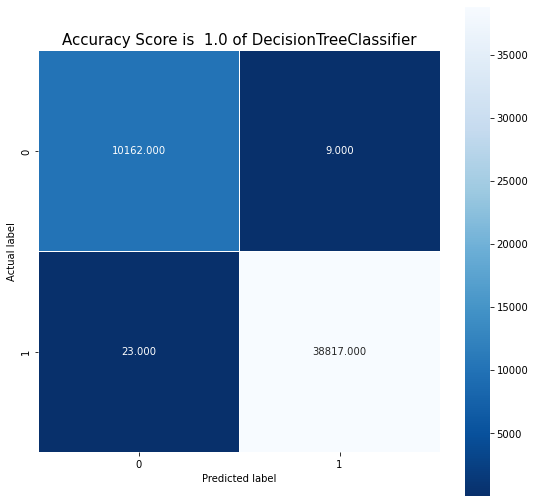

In [17]:
# Create  classifier object.
dtree = DecisionTreeClassifier()
ApplyClassifier(dtree)

Visualizing the decision tree

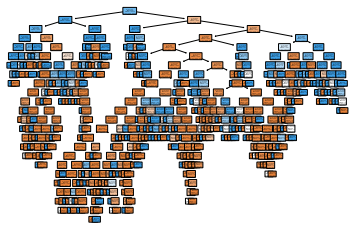

In [143]:
# Visualising the graph without the use of graphvizplt.figure(figsize = (20,20))
dec_tree = plot_tree(decision_tree=dtree, feature_names = df1.columns,
                     class_names =["1", "2"] , filled = True , precision = 3, rounded = True)

# 2. KNeighbors Classifier

-----------------------------------------------------------------------------------------
Classifier Name:  KNeighborsClassifier
-----------------------------------------------------------------------------------------
1 of KFold 5
           >Train: 1=40686, 2=155358, Test: 1=10172, 2=38840
           ROC AUC score: 0.9996079431714774
2 of KFold 5
           >Train: 1=40686, 2=155359, Test: 1=10172, 2=38839
           ROC AUC score: 0.9996313440998963
3 of KFold 5
           >Train: 1=40686, 2=155359, Test: 1=10172, 2=38839
           ROC AUC score: 0.9997167795257345
4 of KFold 5
           >Train: 1=40687, 2=155358, Test: 1=10171, 2=38840
           ROC AUC score: 0.9995541014359904
5 of KFold 5
           >Train: 1=40687, 2=155358, Test: 1=10171, 2=38840
           ROC AUC score: 0.9996547541165535
-----------------------------------------------------------------------------------------
List of possible accuracy are : 0.99955 ,  0.99953  ,  0.99955

Maximum Accuracy That can be obt

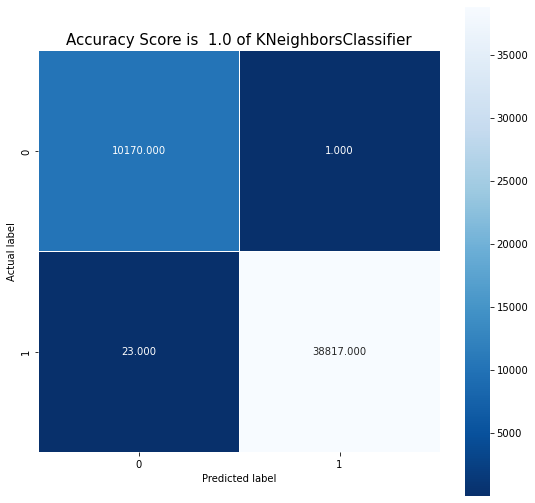

In [18]:
# Create  classifier object.
k = KNeighborsClassifier()
ApplyClassifier(k)

# 3. AdaBoostClassifier

-----------------------------------------------------------------------------------------
Classifier Name:  AdaBoostClassifier
-----------------------------------------------------------------------------------------
1 of KFold 5
           >Train: 1=40686, 2=155358, Test: 1=10172, 2=38840
           ROC AUC score: 0.9235979362989536
2 of KFold 5
           >Train: 1=40686, 2=155359, Test: 1=10172, 2=38839
           ROC AUC score: 0.9227771870418569
3 of KFold 5
           >Train: 1=40686, 2=155359, Test: 1=10172, 2=38839
           ROC AUC score: 0.9245092964566701
4 of KFold 5
           >Train: 1=40687, 2=155358, Test: 1=10171, 2=38840
           ROC AUC score: 0.9282899038187469
5 of KFold 5
           >Train: 1=40687, 2=155358, Test: 1=10171, 2=38840
           ROC AUC score: 0.9231340410089429
-----------------------------------------------------------------------------------------
List of possible accuracy are : 0.95332 ,  0.95368  ,  0.9547

Maximum Accuracy That can be obtain

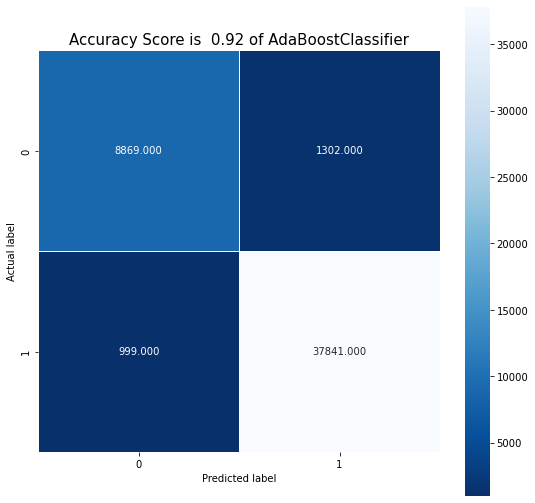

In [19]:
# Create  classifier object.
Ada = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, algorithm='SAMME.R')
ApplyClassifier(Ada)

# 4. LogisticRegression

-----------------------------------------------------------------------------------------
Classifier Name:  LogisticRegression
-----------------------------------------------------------------------------------------
1 of KFold 5
           >Train: 1=40686, 2=155358, Test: 1=10172, 2=38840
           ROC AUC score: 0.8799387355204185
2 of KFold 5
           >Train: 1=40686, 2=155359, Test: 1=10172, 2=38839
           ROC AUC score: 0.8817356745017649
3 of KFold 5
           >Train: 1=40686, 2=155359, Test: 1=10172, 2=38839
           ROC AUC score: 0.8841933952677609
4 of KFold 5
           >Train: 1=40687, 2=155358, Test: 1=10171, 2=38840
           ROC AUC score: 0.8877354017667605
5 of KFold 5
           >Train: 1=40687, 2=155358, Test: 1=10171, 2=38840
           ROC AUC score: 0.8844174009099395
-----------------------------------------------------------------------------------------
List of possible accuracy are : 0.91753 ,  0.91773  ,  0.91939

Maximum Accuracy That can be obtai

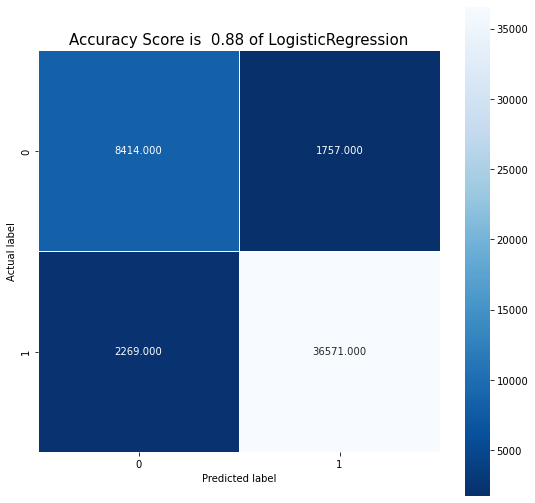

In [20]:
# Create  classifier object.
lr = LogisticRegression()
ApplyClassifier(lr)

# 5. Naive Bayes Classification

-----------------------------------------------------------------------------------------
Classifier Name:  GaussianNB
-----------------------------------------------------------------------------------------
1 of KFold 5
           >Train: 1=40686, 2=155358, Test: 1=10172, 2=38840
           ROC AUC score: 0.8494471607405154
2 of KFold 5
           >Train: 1=40686, 2=155359, Test: 1=10172, 2=38839
           ROC AUC score: 0.8542522613468588
3 of KFold 5
           >Train: 1=40686, 2=155359, Test: 1=10172, 2=38839
           ROC AUC score: 0.855135863563809
4 of KFold 5
           >Train: 1=40687, 2=155358, Test: 1=10171, 2=38840
           ROC AUC score: 0.8577942302487404
5 of KFold 5
           >Train: 1=40687, 2=155358, Test: 1=10171, 2=38840
           ROC AUC score: 0.8553469477293583
-----------------------------------------------------------------------------------------
List of possible accuracy are : 0.92188 ,  0.92357  ,  0.92485

Maximum Accuracy That can be obtained from 

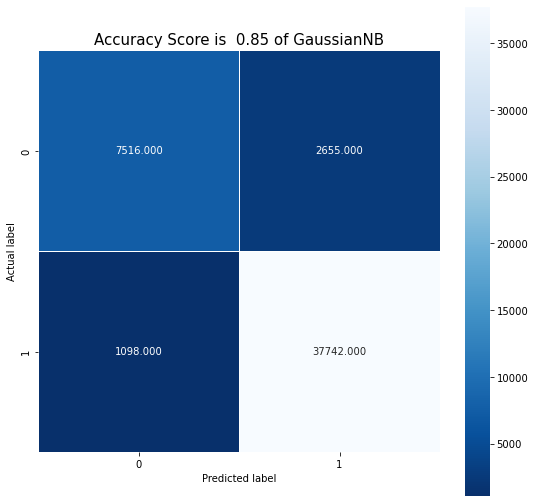

In [21]:
# Create  classifier object.
nBayes = GaussianNB()
ApplyClassifier(nBayes)